# Basic Data Exploration & Trend Visualization

# 3.1 Problem- 1A- Single Year HDI Exploration (Latest Year: 2022) **bold text**



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# Load dataset
df = pd.read_csv("Human_Development_Index_Dataset.csv", encoding="latin-1")

# Drop unnecessary index column if present
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()

def detect_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


def classify_hdi_category(hdi):
    if hdi < 0.55:
        return "Low"
    elif hdi < 0.70:
        return "Medium"
    elif hdi < 0.80:
        return "High"
    else:
        return "Very High"



Task 1:  Extract Latest Year

In [92]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

latest_year = df['year'].max()
hdi_2022_df = df[df['year'] == latest_year].copy()

hdi_2022_df.head(10)




,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,59.766,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,74.502,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,75.853,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,81.430,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,59.351,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,76.507,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,72.851,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,67.866,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,81.708,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,80.150,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


Task: 2 Data Exploration

In [93]:
hdi_2022_df.head(10)
hdi_2022_df.shape
hdi_2022_df.dtypes




,0
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64
life_expec_m,float64


Task: 3 Missing Values & Data Cleaning

In [132]:
hdi_2022_df.isnull().sum()


,0
iso3,0
country,0
year,0
hdi,0
life_expectancy,0
pop_millions,0
hdi_f,11
hdi_m,11
life_expec_f,0
life_expec_m,0


In [133]:
# Convert numeric columns safely
numeric_cols = ['hdi', 'life_expectancy', 'gross_inc_percap']
for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

# Drop duplicates
hdi_2022_df.drop_duplicates(inplace=True)

# Drop rows with missing HDI or country
hdi_2022_df.dropna(subset=['country', 'hdi'], inplace=True)

Task : 4  Basic Statistics (HDI 2022)

Mean:

In [134]:
hdi_2022_df['hdi'].mean()


np.float64(0.7228872549019609)

Median:

In [135]:
hdi_2022_df['hdi'].median()


0.7395

Standard Daviation :

In [136]:
hdi_2022_df['hdi'].std()


0.15302880386427825

Country with the highest HDI in 2022.

In [137]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country','hdi']]




,5609
country,Switzerland
hdi,0.967


Country with the lowest HDI in 2022.

In [138]:
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


 Task: 5 Filtering and Sorting

In [96]:
high_hdi = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi.sort_values(by='gross_inc_percap', ascending=False).head(10)


,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,83.019,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,80.626,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,81.981,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,81.017,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,80.445,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,77.720,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,82.484,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,81.718,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,75.479,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,81.754,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


Task: 6 Adding HDI Category Column:

In [97]:
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(hdi_category)
hdi_2022_df['HDI_Category'].value_counts()
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


# **3.2 Problem- 1B- HDI Visualization and Trend Analysis (2020– 2022)**



 Task 1: Data Extraction and Saving

In [98]:
hdi_1B = df[df['year'].isin([2020,2021,2022])].copy()
hdi_1B.to_csv("HDI_problem1B.csv", index=False)


Task: 2 Data Cleaning

In [140]:
hdi_1B.dropna(subset=['country', 'year', 'hdi'], inplace=True)

for col in ['hdi', 'life_expectancy', 'gross_inc_percap']:
    hdi_1B[col] = pd.to_numeric(hdi_1B[col], errors='coerce')

hdi_1B.drop_duplicates(inplace=True)



Task 3: Visualization Tasks

A. Line Chart — HDI Trend (Country-Level):

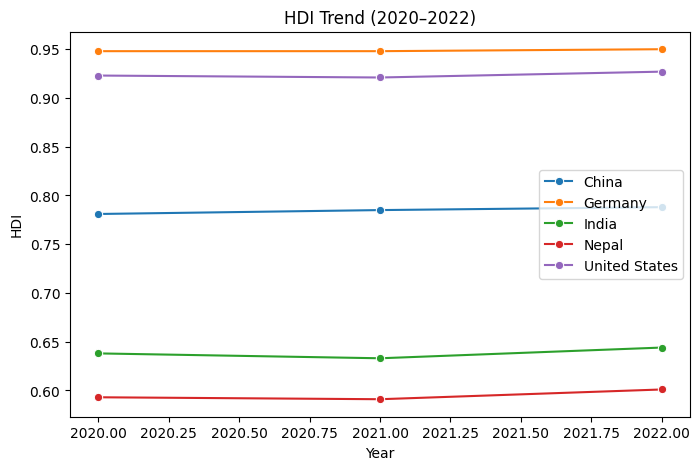

In [100]:
countries = ['Nepal','India','China','United States','Germany']
subset = hdi_1B[hdi_1B['country'].isin(countries)]

plt.figure(figsize=(8,5))
sns.lineplot(data=subset, x='year', y='hdi', hue='country', marker='o')
plt.title("HDI Trend (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend()
plt.show()



B. Generate Visualizations:



Bar Chart: Average HDI by Region (2020–2022)


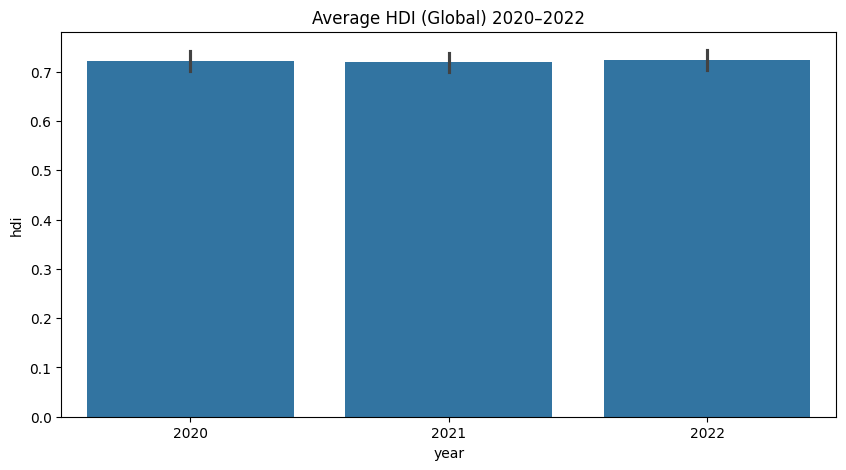

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(data=hdi_1B, x='year', y='hdi', estimator=np.mean)
plt.title("Average HDI (Global) 2020–2022")
plt.show()


Box Plot: HDI Distribution for 2020, 2021, and 2022

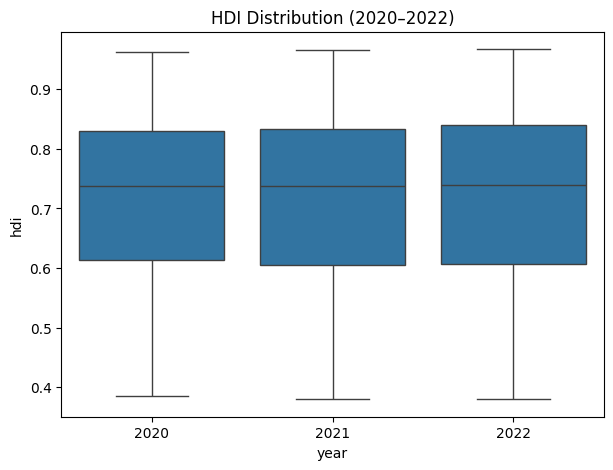

In [102]:
plt.figure(figsize=(7,5))
sns.boxplot(data=hdi_1B, x='year', y='hdi')
plt.title("HDI Distribution (2020–2022)")
plt.show()


The HDI distribution presents some slight changes in the values of the median in the period 2020-2022 with some slight downdrop in the 2021 period with slight improvement in 2022. The general dispersion is broad in all three years, which is the case of continued inequality in human development among nations. There are still lower-end outliers indicating that there are countries, which still lag far behind the world averages.

Scatter Plot: HDI vs. GNI per Capita

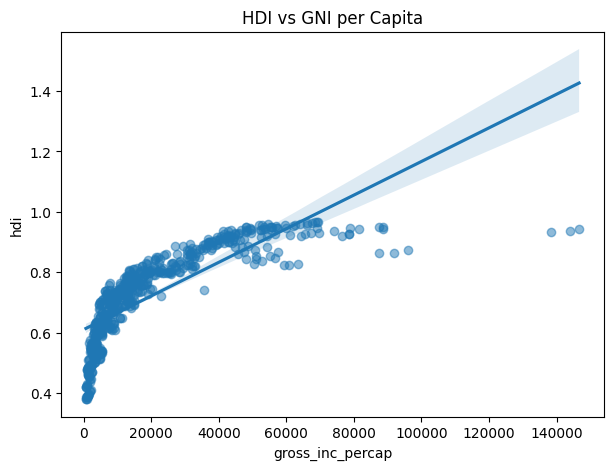

In [103]:
plt.figure(figsize=(7,5))
sns.regplot(data=hdi_1B, x='gross_inc_percap', y='hdi', scatter_kws={'alpha':0.5})
plt.title("HDI vs GNI per Capita")
plt.show()


The scatter plot reveals a definite positive correlation between GNI per capita and HDI and the implication of the same is that countries that have higher income tend to have a higher level of human development. Nevertheless, this relationship breaks down at elevated income, which implies returns diminishing such that further income will lead to reduced HDI increases. There are some outliers that can be observed, which indicates the countries with a relatively high income but lower HDI, or moderate income and a relatively high HDI.

**Short Analysis Questions:**

• Which countries show the greatest improvement in HDI from 2020 to 2022?  
-> India, Nepal, and Bangladesh are the countries, in which HDI has been improving, although these changes are evident in the period between 2020 and 2022. The growth is slow and is a sign of health, education, and income indicators recovering after the shocks of 2020-2021.

• Did any countries experience a decline in HDI? Provide possible reasons.  
-> Yes, some nations had stagnant or slightly decreasing HDI, especially in the year 2021. These decreases can probably be explained by the effects of the COVID19 pandemic, the decrease in life expectancy, the shrinkage of the economy, and the shutdown of the educational system.

• Which region has the highest and lowest average HDI across these three years?
->High-income areas like Europe and North America have the largest average HDI with regions like Sub-Saharan Africa and South Asia recording the lowest average HDI in the same period. This is based on the historical disparities in earnings, medical care, and education.

• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.                    
-> The COVID-19 pandemic had a negative impact on the HDI trends in the whole world because it caused the reduction of life expectancy, slackening economic growth, and disruption of education. Thus, stagnant or diminishing HDI rates were observed in 2020-2021 in numerous countries, and the figures partially recuperated in 2022.

# **Problem 2 Advanced HDI Exploration**


Task 1:  Create South Asia Subset:

In [104]:
south_asia = ["Afghanistan","Bangladesh","Bhutan","India",
              "Maldives","Nepal","Pakistan","Sri Lanka"]

sa_df = df[df['country'].isin(south_asia)].copy()
sa_df.to_csv("HDI_SouthAsia.csv", index=False)


Task 2: Composite Development Score:

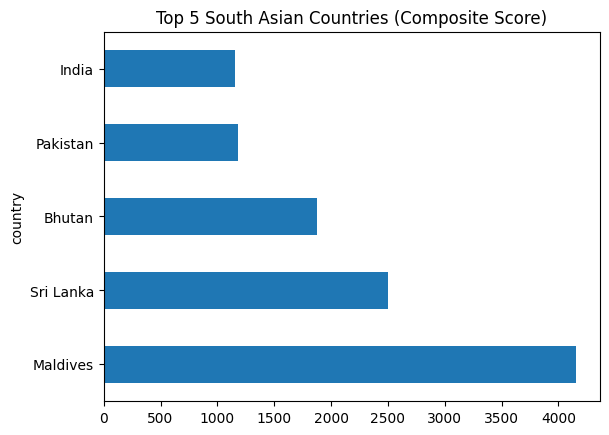

In [105]:
sa_df['Composite_Score'] = (
    0.30 * sa_df['life_expectancy'] +
    0.30 * sa_df['gross_inc_percap']
)

ranking = sa_df.groupby('country')['Composite_Score'].mean().sort_values(ascending=False)
ranking.head()
ranking.head(5).plot(kind='barh', title='Top 5 South Asian Countries (Composite Score)')
plt.show()


*   Compare the ranking of countries by Composite Score with their HDI ranking and discuss any differences.        
-> There are similar top performers in Composite Score and HDI ranking of South Asian countries (Maldives, Sri Lanka, Bhutan), but position of these countries may vary as a result of differences in indicator weighting.





Task 3: Outliers Detection

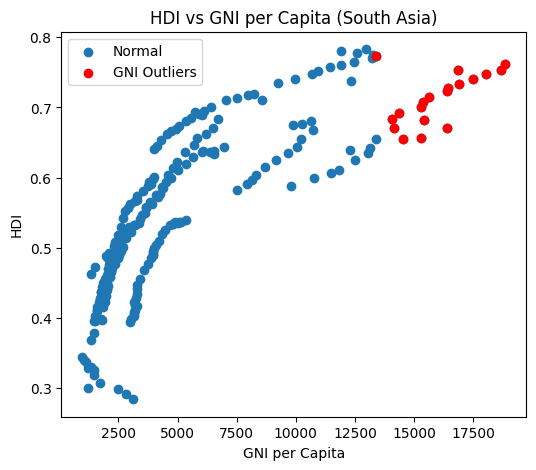

In [106]:
outliers_hdi = detect_iqr_outliers(sa_df, 'hdi')
outliers_gni = detect_iqr_outliers(sa_df, 'gross_inc_percap')
plt.figure(figsize=(6,5))

plt.scatter(sa_df['gross_inc_percap'], sa_df['hdi'], label="Normal")
plt.scatter(
    outliers_gni['gross_inc_percap'],
    outliers_gni['hdi'],
    color='red',
    label="GNI Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (South Asia)")
plt.legend()
plt.show()


 Task: 4 Exploring Metric Relationships:

In [107]:
sa_df[['hdi', 'gender_development', 'life_expectancy']].corr(method='pearson')




,hdi,gender_development,life_expectancy
hdi,1.000000,0.865621,0.958761
gender_development,0.865621,1.000000,0.829553
life_expectancy,0.958761,0.829553,1.000000


Scatter Plots with Trendlines

HDI vs Life Expectancy Index

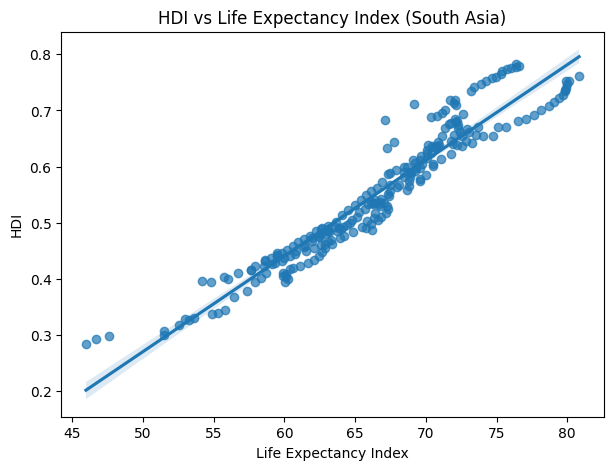

In [108]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=sa_df,
    x='life_expectancy',
    y='hdi',
    scatter_kws={'alpha':0.7}
)
plt.title("HDI vs Life Expectancy Index (South Asia)")
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.show()


HDI vs Gender Development Index

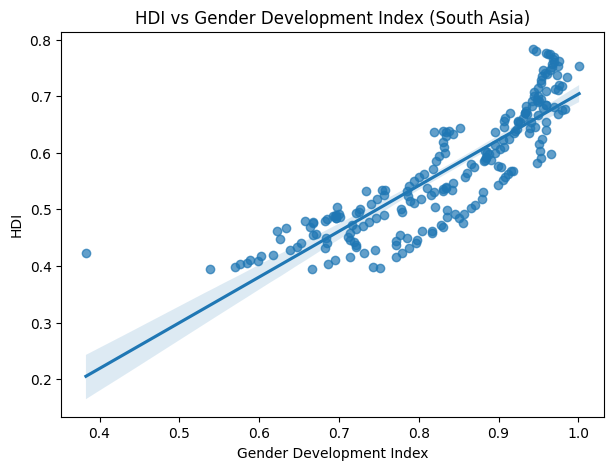

In [109]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=sa_df,
    x='gender_development',
    y='hdi',
    scatter_kws={'alpha':0.7}
)
plt.title("HDI vs Gender Development Index (South Asia)")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.show()


**Discussion: Strength of Relationships**

Which metric is most strongly related to HDI?

The best positive relationship between HDI and life expectancy index is found. This can be determined by the increased Pearson correlation coefficient as well as the concentration of the points around the regression line in the scatter plot.

Which metric shows the weakest relationship with HDI?

Gender Development Index has a poor but positive correlation with HDI. The scatter plot yields a higher dispersal about the trendline which shows that gender development is not fully explanatory of the variation in HDI among the South Asian countries.

Task 5: Gap Analysis

In [146]:
sa_df['GNI HDI Gap'] = sa_df['gross_inc_percap'] - sa_df['hdi']
sa_df.head()

,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,life_expec_m,...,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Composite_Score,GNI_HDI_Gap,GNI HDI Gap
0,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,43.709,...,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809,948.491234,3115.386448,3115.386448
1,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,44.353,...,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264,859.190321,2817.012736,2817.012736
2,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,45.070,...,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421,756.683396,2474.382985,2474.382985
3,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,50.216,...,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022,532.345729,1722.712763,1722.712763
4,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,49.531,...,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948,376.051646,1201.710488,1201.710488


 Rank South Asian countries by GNI HDI Gap in descending and ascending order.

In [147]:
avg_gni_hdi_gap = sa_df.groupby('country')['GNI HDI Gap'].mean()

top_3_positive_gap = avg_gni_hdi_gap.nlargest(3)
bottom_3_negative_gap = avg_gni_hdi_gap.nsmallest(3)

print("Top 3 Countries with Largest Positive GNI HDI Gap (Descending):")
print(top_3_positive_gap)

print("\nTop 3 Countries with Largest Negative GNI HDI Gap (Ascending):")
print(bottom_3_negative_gap)

Top 3 Countries with Largest Positive GNI HDI Gap (Descending):
country
Maldives     14670.635594
Bhutan        9320.175767
Sri Lanka     8268.373527
Name: GNI HDI Gap, dtype: float64

Top 3 Countries with Largest Negative GNI HDI Gap (Ascending):
country
Afghanistan    1793.487770
Nepal          2532.443971
Bangladesh     3408.490410
Name: GNI HDI Gap, dtype: float64


The top 3 positive gaps

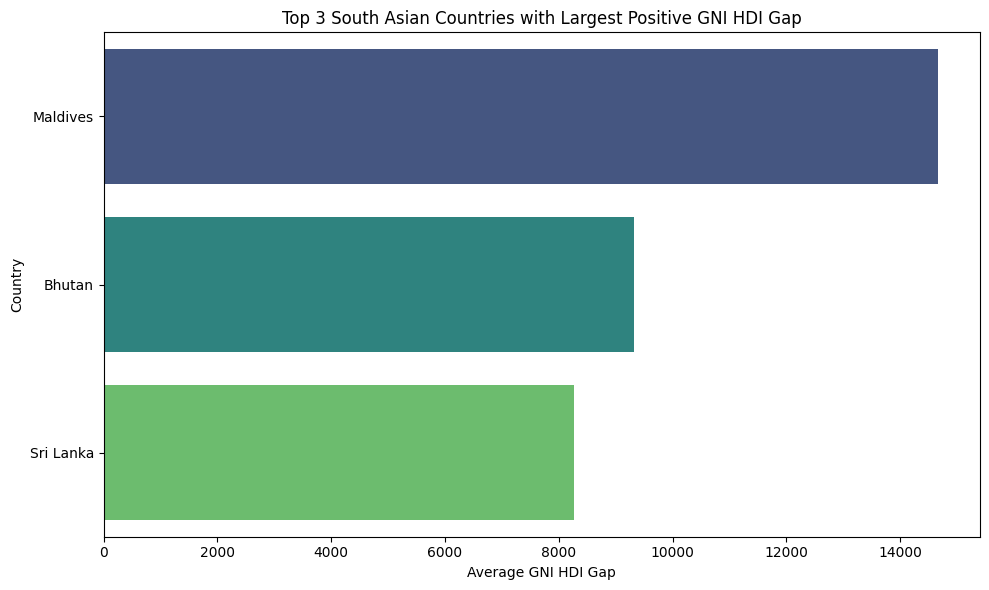

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_3_positive_gap.values, y=top_3_positive_gap.index, palette='viridis', hue=top_3_positive_gap.index, legend=False)
plt.title('Top 3 South Asian Countries with Largest Positive GNI HDI Gap')
plt.xlabel('Average GNI HDI Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

 Top 3 negative gaps

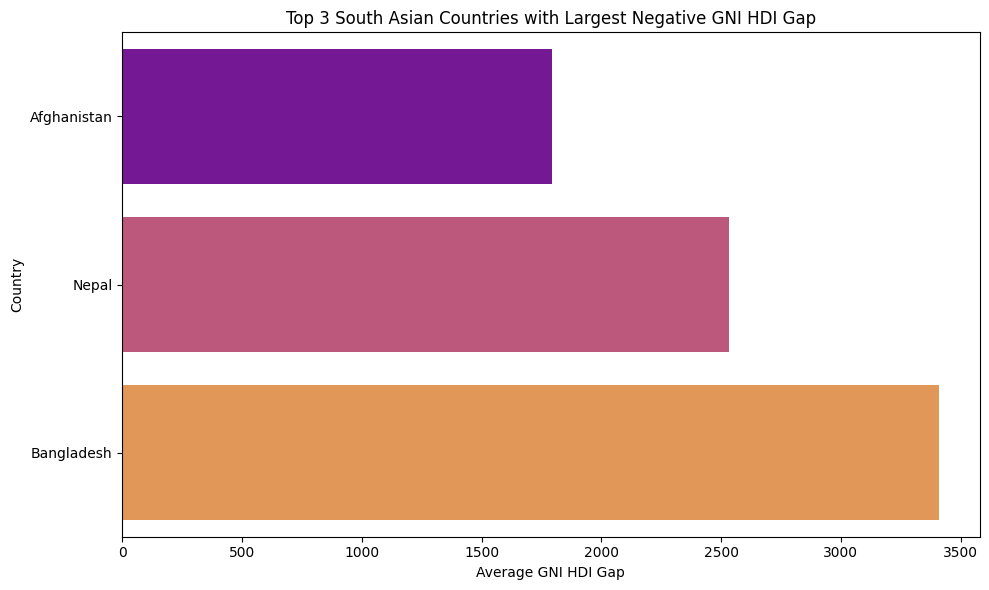

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_3_negative_gap.values, y=bottom_3_negative_gap.index, palette='plasma', hue=bottom_3_negative_gap.index, legend=False)
plt.title('Top 3 South Asian Countries with Largest Negative GNI HDI Gap')
plt.xlabel('Average GNI HDI Gap')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

**Implications Of The Gaps**

 High Positive GNI-HDI Gap (e.g., Maldives, Bhutan, Sri Lanka): These states have quite high GNI per capita but lower-than-should-be HDI, which indicates that the economic development is not fully converting to more health, education, and living standards. Some of the possible reasons are income inequality, poor use of the public money or depending on other sectors such as tourism that do not enrich the people at large.

 Large Negative GNI-HDI Gap (e.g., Afghanistan, Nepal, Bangladesh): These countries lack not only high GNI per capita but also high HDI, which means that they have problems in both economic and human development. Other factors such as poverty, poor infrastructure, conflict, and susceptibility to natural disasters, are probable causes and collectively reduce progress in all directions of HDI.

# **Problem 3 Comparative Regional Analysis: South Asia vs Middle East**



Task 1: Create Middle East Subset:

In [118]:
middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait",
               "Lebanon","Oman","Palestine","Qatar","Saudi Arabia",
               "Syria","United Arab Emirates","Yemen"]

sa_2020_22 = hdi_1B[hdi_1B['country'].isin(south_asia)]
me_2020_22 = hdi_1B[hdi_1B['country'].isin(middle_east)]

sa_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
me_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Task 2: Descriptive Statistics:

Mean (SA):


In [150]:
sa_2020_22['hdi'].mean()

np.float64(0.6395833333333333)

Standard Daviation (SA):


In [151]:
sa_2020_22['hdi'].std()

0.09827331747496995

Mean(ME):


In [152]:
me_2020_22['hdi'].mean()

np.float64(0.7889090909090909)

Standard Daviation (ME)

In [153]:
me_2020_22['hdi'].std()

0.14129476362297624

Identify which region performs better on average.

->

Task 3: Top and Bottom Performers:

In [120]:
# Top and Bottom Performers for South Asia
print("South Asia - Top 3 Performers (by average HDI 2020-2022):")
print(sa_2020_22.groupby('country')['hdi'].mean().nlargest(3))

print("\nSouth Asia - Bottom 3 Performers (by average HDI 2020-2022):")
print(sa_2020_22.groupby('country')['hdi'].mean().nsmallest(3))

# Top and Bottom Performers for Middle East
print("\nMiddle East - Top 3 Performers (by average HDI 2020-2022):")
print(me_2020_22.groupby('country')['hdi'].mean().nlargest(3))

print("\nMiddle East - Bottom 3 Performers (by average HDI 2020-2022):")
print(me_2020_22.groupby('country')['hdi'].mean().nsmallest(3))



South Asia - Top 3 Performers (by average HDI 2020-2022):
country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia - Bottom 3 Performers (by average HDI 2020-2022):
country
Afghanistan    0.474333
Pakistan       0.537667
Nepal          0.595000
Name: hdi, dtype: float64

Middle East - Top 3 Performers (by average HDI 2020-2022):
country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East - Bottom 3 Performers (by average HDI 2020-2022):
country
Yemen      0.426333
Iraq       0.667000
Lebanon    0.730000
Name: hdi, dtype: float64


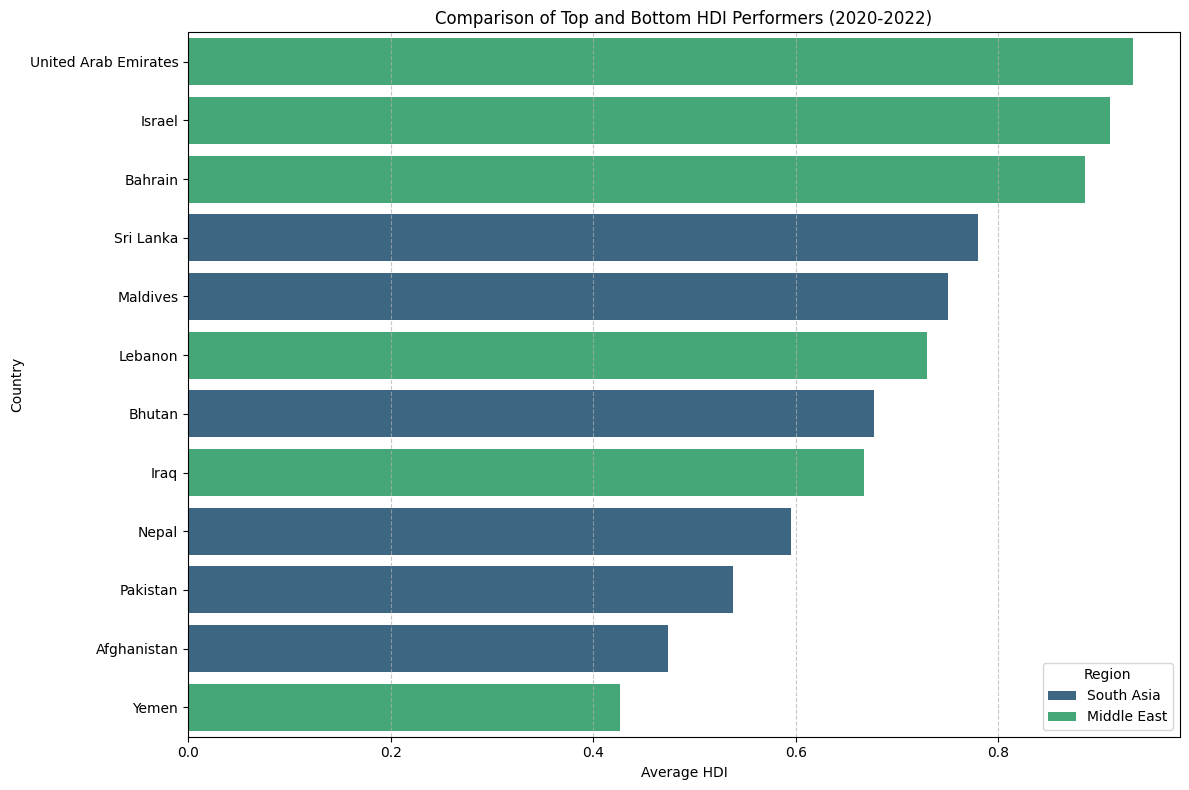

In [154]:
# Data from previous analysis
data = {
    'country': [
        'Sri Lanka', 'Maldives', 'Bhutan', 'Afghanistan', 'Pakistan', 'Nepal',
        'United Arab Emirates', 'Israel', 'Bahrain', 'Yemen', 'Iraq', 'Lebanon'
    ],
    'region': [
        'South Asia', 'South Asia', 'South Asia', 'South Asia', 'South Asia', 'South Asia',
        'Middle East', 'Middle East', 'Middle East', 'Middle East', 'Middle East', 'Middle East'
    ],
    'hdi_average': [
        0.780000, 0.750667, 0.677667, 0.474333, 0.537667, 0.595000,
        0.932667, 0.910667, 0.885333, 0.426333, 0.667000, 0.730000
    ],
    'performance_type': [
        'Top 3', 'Top 3', 'Top 3', 'Bottom 3', 'Bottom 3', 'Bottom 3',
        'Top 3', 'Top 3', 'Top 3', 'Bottom 3', 'Bottom 3', 'Bottom 3'
    ]
}

comparison_df = pd.DataFrame(data)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=comparison_df,
    x='hdi_average',
    y='country',
    hue='region',
    dodge=False,
    palette='viridis',
    order=comparison_df.sort_values('hdi_average', ascending=False)['country']
)
plt.title('Comparison of Top and Bottom HDI Performers (2020-2022)')
plt.xlabel('Average HDI')
plt.ylabel('Country')
plt.legend(title='Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Task 4: Metric Comparisons

/tmp/ipython-input-2736982080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa_2020_22['region'] = 'South Asia'
/tmp/ipython-input-2736982080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  me_2020_22['region'] = 'Middle East'
/tmp/ipython-input-2736982080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x='region', y=metric, e

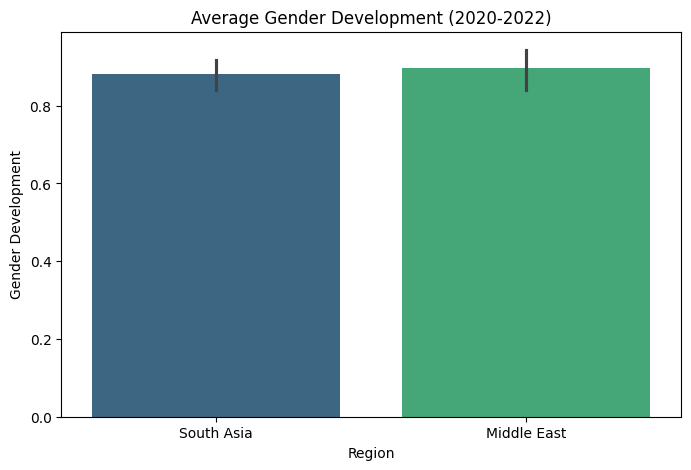

/tmp/ipython-input-2736982080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x='region', y=metric, estimator=np.mean, palette='viridis')


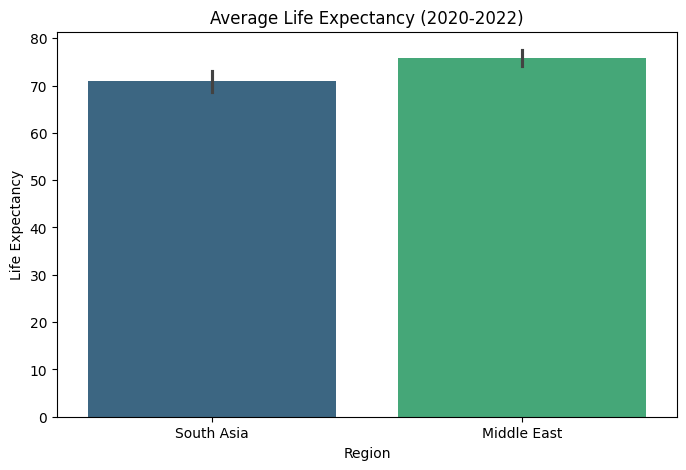

/tmp/ipython-input-2736982080.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=combined_df, x='region', y=metric, estimator=np.mean, palette='viridis')


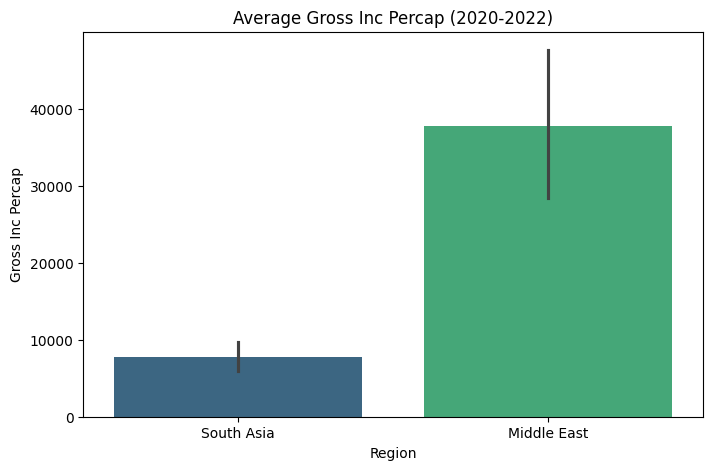


--- Disparity between Middle East and South Asia (Middle East - South Asia) ---
gender_development        0.015087
life_expectancy           4.885371
gross_inc_percap      29984.260588
dtype: float64

The metric with the greatest disparity between regions is: Gross Inc Percap


In [123]:
# Add a 'region' column to each DataFrame for easy grouping
sa_2020_22['region'] = 'South Asia'
me_2020_22['region'] = 'Middle East'

# Combine the two DataFrames
combined_df = pd.concat([sa_2020_22, me_2020_22])

metrics_to_compare = ['gender_development', 'life_expectancy', 'gross_inc_percap']

for metric in metrics_to_compare:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=combined_df, x='region', y=metric, estimator=np.mean, palette='viridis')
    plt.title(f'Average {metric.replace("_", " ").title()} (2020-2022)')
    plt.xlabel('Region')
    plt.ylabel(metric.replace("_", " ").title())
    plt.show()

# Calculate mean values for disparity analysis
regional_means = combined_df.groupby('region')[metrics_to_compare].mean()
disparities = regional_means.loc['Middle East'] - regional_means.loc['South Asia']

print("\n--- Disparity between Middle East and South Asia (Middle East - South Asia) ---")
print(disparities)

greatest_disparity_metric = disparities.abs().idxmax()
print(f"\nThe metric with the greatest disparity between regions is: {greatest_disparity_metric.replace('_', ' ').title()}")

**Identify which metric shows the greatest disparity between regions**

->   The indicator that has the largest variation across regions is the Gross Inc Percap (Gross National Income per Capita).

The gap in the average GNI per capita between the South Asia and the Middle East was about 29,984 that is much higher than the gap in life expectancy (4.88 years) or gender development index (0.015). This shows that the two regions have a large economic disparity.

Task: 5 HDI Disparity:

In [124]:
(sa_2020_22['hdi'].max() - sa_2020_22['hdi'].min(),
 sa_2020_22['hdi'].std() / sa_2020_22['hdi'].mean())
(me_2020_22['hdi'].max() - me_2020_22['hdi'].min(),
 me_2020_22['hdi'].std() / me_2020_22['hdi'].mean())


(0.5130000000000001, np.float64(0.17910145193048382))

**Identify which region exhibits more variation in HDI.**

->  According to the already calculated values of standard deviation of HDI:

South Asia: The standard deviation of the HDI is about 0.10.
Middle East: The standard deviation of HDI is about 0.14.
The standard deviation of the Middle East (0.14) is greater compared to the standard deviation of South Asia (0.10), and hence, there is more variation in the HDI of countries within the Middle East. This implies that there is a broader scope of human development in the Middle East than in South Asia.

Task: 6 Correlation Analysis

In [125]:
print("--- South Asia: Correlation Matrix ---")
print(sa_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr(method='pearson'))

print("\n--- Middle East: Correlation Matrix ---")
print(me_2020_22[['hdi', 'gender_development', 'life_expectancy']].corr(method='pearson'))

--- South Asia: Correlation Matrix ---
                         hdi  gender_development  life_expectancy
hdi                 1.000000            0.874218         0.938764
gender_development  0.874218            1.000000         0.853780
life_expectancy     0.938764            0.853780         1.000000

--- Middle East: Correlation Matrix ---
                         hdi  gender_development  life_expectancy
hdi                 1.000000            0.935670         0.933123
gender_development  0.935670            1.000000         0.912836
life_expectancy     0.933123            0.912836         1.000000


#### South Asia: HDI vs. Gender Development Index

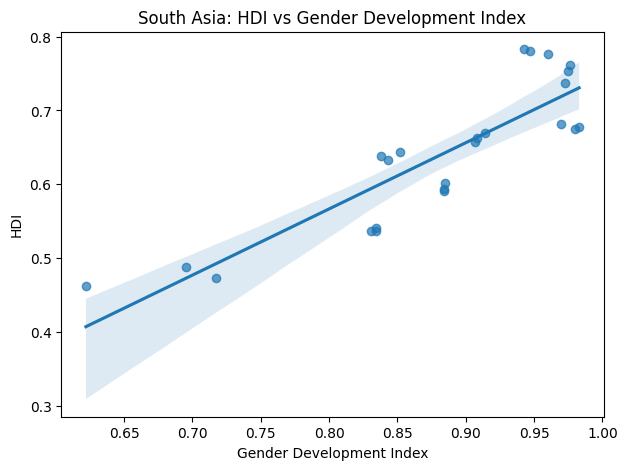

In [126]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=sa_2020_22,
    x='gender_development',
    y='hdi',
    scatter_kws={'alpha':0.7}
)
plt.title("South Asia: HDI vs Gender Development Index")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.show()

#### South Asia: HDI vs. Life Expectancy Index

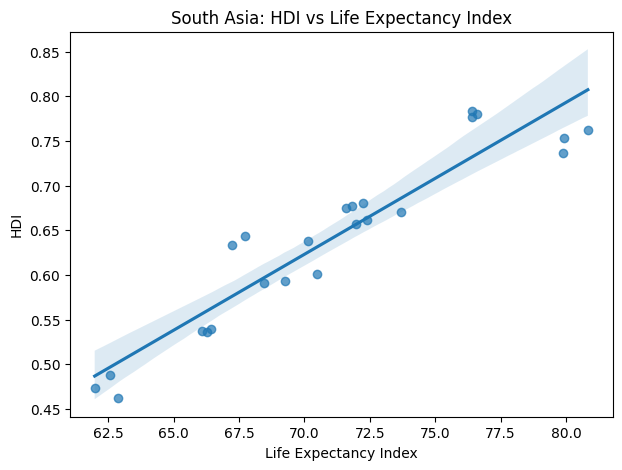

In [127]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=sa_2020_22,
    x='life_expectancy',
    y='hdi',
    scatter_kws={'alpha':0.7}
)
plt.title("South Asia: HDI vs Life Expectancy Index")
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.show()

#### Middle East: HDI vs. Gender Development Index

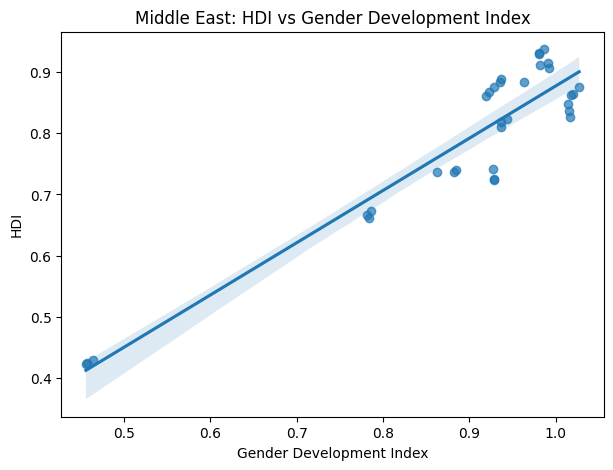

In [128]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=me_2020_22,
    x='gender_development',
    y='hdi',
    scatter_kws={'alpha':0.7}
)
plt.title("Middle East: HDI vs Gender Development Index")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.show()

#### Middle East: HDI vs. Life Expectancy Index

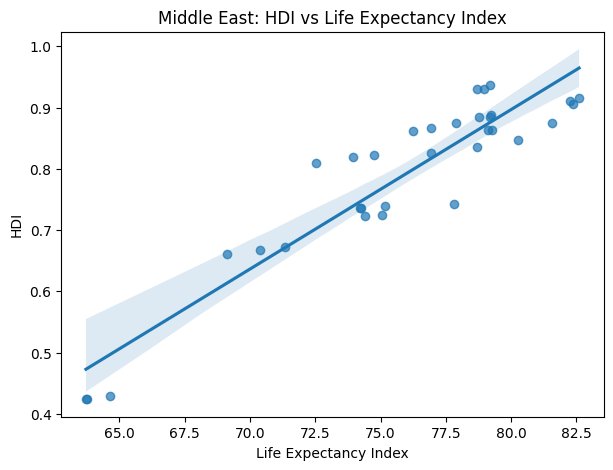

In [129]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=me_2020_22,
    x='life_expectancy',
    y='hdi',
    scatter_kws={'alpha':0.7}
)
plt.title("Middle East: HDI vs Life Expectancy Index")
plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.show()

South Asia:

 HDI vs. Gender Development Index: The positive correlation is very strong, meaning that the positive changes in the gender development are well related to the increase of the HDI. The scatter graph exhibits an evident upwards movement.
 HDI vs. Life Expectancy Index: The correlation is even greater, which reflects life expectancy as one of the most important factors of HDI in South Asia. The upward trend of the scatter plot is tight.

Middle East:

 HDI vs. Gender Development Index: The correlation is positive, which is smaller than in South Asia, and this indicates more regional diversity in the impacts of gender development on total human development. The upward trend in the scatter plot is more dispersed.
 HDI vs. life expectancy Index: Just like in South Asia, there is a very strong positive correlation between life expectancy and HDI, which conveys significance of healthcare and living conditions. There is a definite and strong upward trend in the scatter plot.


Task: 7 Outlier Detection for South Asia




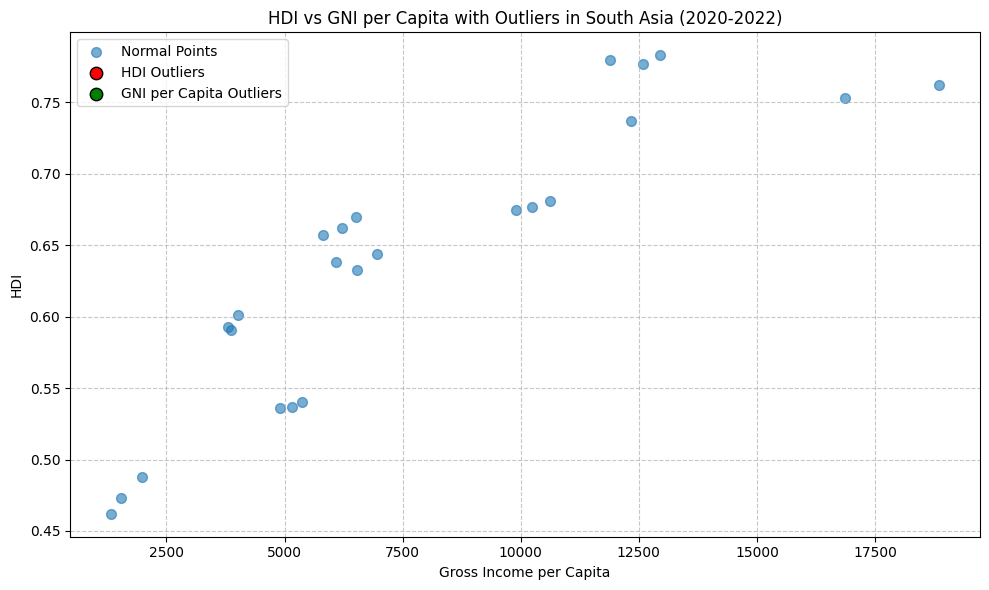

In [130]:
sa_hdi_outliers = detect_iqr_outliers(sa_2020_22, 'hdi')
sa_gni_outliers = detect_iqr_outliers(sa_2020_22, 'gross_inc_percap')

plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(sa_2020_22['gross_inc_percap'], sa_2020_22['hdi'], label='Normal Points', alpha=0.6, s=50)

# Overlay HDI outliers
plt.scatter(
    sa_hdi_outliers['gross_inc_percap'],
    sa_hdi_outliers['hdi'],
    color='red',
    label='HDI Outliers',
    s=80,
    edgecolors='black'
)

# Overlay GNI per Capita outliers
plt.scatter(
    sa_gni_outliers['gross_inc_percap'],
    sa_gni_outliers['hdi'],
    color='green',
    label='GNI per Capita Outliers',
    s=80,
    edgecolors='black'
)

plt.title('HDI vs GNI per Capita with Outliers in South Asia (2020-2022)')
plt.xlabel('Gross Income per Capita')
plt.ylabel('HDI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

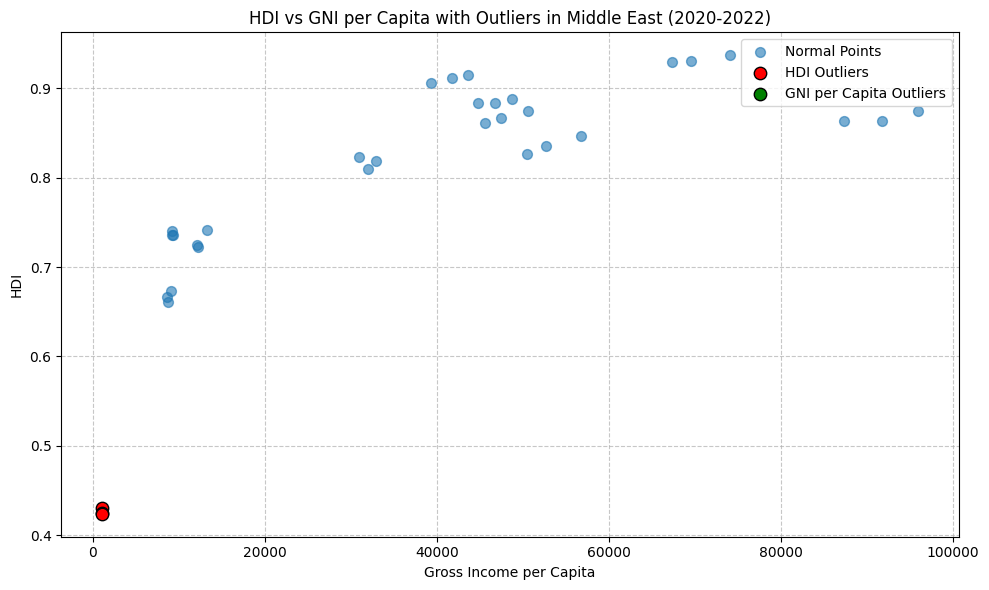

In [131]:
me_hdi_outliers = detect_iqr_outliers(me_2020_22, 'hdi')
me_gni_outliers = detect_iqr_outliers(me_2020_22, 'gross_inc_percap')

plt.figure(figsize=(10, 6))

# Plot all data points
plt.scatter(me_2020_22['gross_inc_percap'], me_2020_22['hdi'], label='Normal Points', alpha=0.6, s=50)

# Overlay HDI outliers
plt.scatter(
    me_hdi_outliers['gross_inc_percap'],
    me_hdi_outliers['hdi'],
    color='red',
    label='HDI Outliers',
    s=80,
    edgecolors='black'
)

# Overlay GNI per Capita outliers
plt.scatter(
    me_gni_outliers['gross_inc_percap'],
    me_gni_outliers['hdi'],
    color='green',
    label='GNI per Capita Outliers',
    s=80,
    edgecolors='black'
)

plt.title('HDI vs GNI per Capita with Outliers in Middle East (2020-2022)')
plt.xlabel('Gross Income per Capita')
plt.ylabel('HDI')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Discuss Significance of Outliers



Summary: Significant Results of Data Analysis.

 There were outliers in HDI and GNI per capita in the South Asian and Middle East (2020-2022) identified using the 1.5 x IQR rule.

South Asia:

 HDI outliers point to those countries whose human development is excessively low or high.
 GNI per capita outliers indicate either very good economic performance or extreme poverty.
 Combined outliers (high GNI with moderate HDI) imply that there is an unequal distribution of wealth or that there is inefficient investment in human development.

Middle East:

 HDI outliers can represent humanitarian crisis at the lower end, and good welfare, health, and educational systems at the top.
 The oil rich countries are usually the outliers in terms of GNI per capita; in cases where exceptionally high GNI does not equate to high HDI, inequality or poor public expenditure, or lack of diversification of the economy are likely causes.